In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import joblib
# importing libraries to be used

In [ ]:
df= pd.read_csv("maternal_health_risk.csv")
#this dataset has information on health risk of pregnant women with respect to necessary data

Analyzing and visualizing data


In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
df.info()
#BS is blood sugar level

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
risk_map={"low risk":0,"mid risk":1,"high risk":2}
df['target'] =df['RiskLevel'].map(risk_map)
#mapping risk level as labels for processing


In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,target
0,25,130,80,15.0,98.0,86,high risk,2
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,2
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0


In [ ]:
X=df.drop(columns=['RiskLevel','target'])
y=df['target']

In [ ]:
X.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


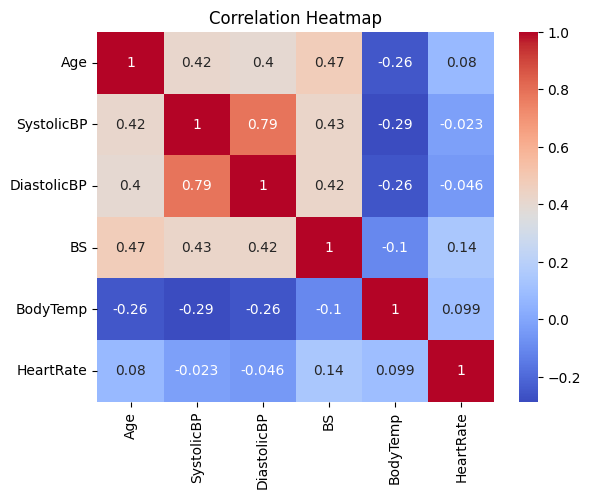

In [ ]:
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)
plt.title("Correlation Heatmap")
plt.show()

model selection

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.2)

In [ ]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#listing models for training
reg_models={
    "linear regression":LinearRegression(),
    "SVM":SVR(),
    "Decision tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor()
}
class_models={
    "logistic regression":LogisticRegression(),
    "SVM":SVC(),
    "Decision tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}

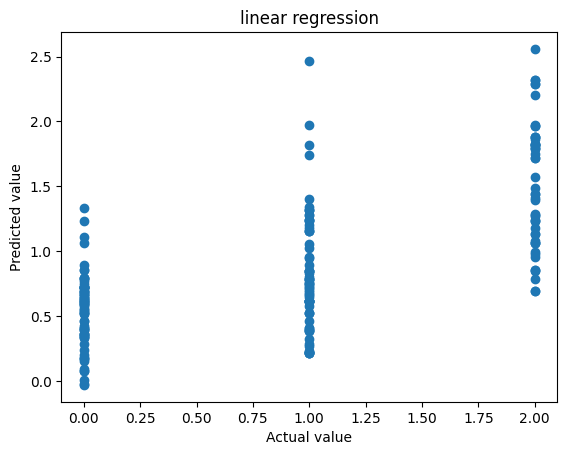

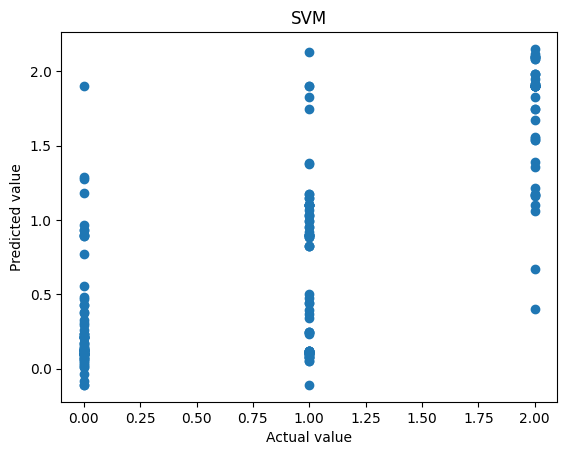

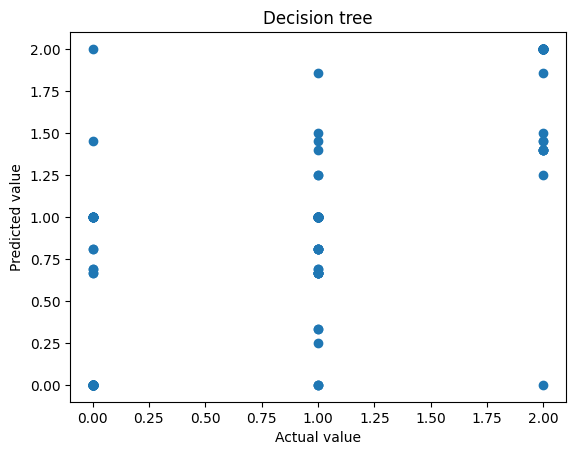

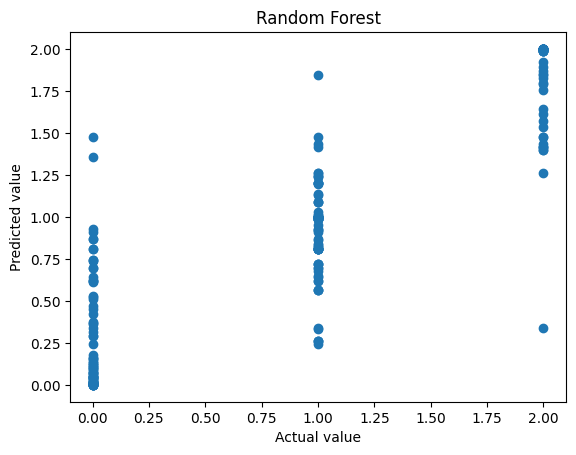

[('linear regression', 0.448157991875873),
 ('SVM', 0.5371483250087961),
 ('Decision tree', 0.6855341642865473),
 ('Random Forest', 0.7652356866319849)]

In [ ]:
#trying different regression models
from numpy.random import random_sample
reg_results=[]
def regression_test(models):
  for name,model in models.items():
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    reg_results.append((name,r2_score(y_test,pred)))
    plt.scatter(y_test, pred)
    plt.xlabel("Actual value")
    plt.ylabel("Predicted value")
    plt.title(name)
    plt.show()

regression_test(reg_models)
reg_results

In [ ]:
#trying classification models
class_results=[]
def classification_test(models):
  for name,model in models.items():
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    class_results.append((name,accuracy_score(y_test,pred)))

classification_test(class_models)
class_results

[('logistic regression', 0.5862068965517241),
 ('SVM', 0.6699507389162561),
 ('Decision tree', 0.7980295566502463),
 ('Random Forest', 0.8275862068965517)]

In [ ]:
#random forest seems to have the best results with this dataset
model = RandomForestClassifier(random_state=50)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [ ]:
#pickling the model and the scaler
joblib.dump(model,"model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [ ]:
#downloading the pickled files
files.download("model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#data for prediction
new_data = {
  "Age": 25,
  "SystolicBP": 120,
  "DiastolicBP": 80,
  "BS": 5.6,
  "BodyTemp": 36.7,
  "HeartRate": 75
}

df = pd.DataFrame([new_data])
scaled_new = scaler.transform(df)
pred = model.predict(scaled_new)
label={0:"low risk",1:"Mid Risk",2:"high risk"}[pred[0]]
print(label)

low risk
